<center> <h1 style="background-color:orange; color:white"><br>Analysis of Online Learning Trends<br></h1></center>

The goal of this project is to analyze data from online learning platforms like Coursera, Udemy, or edX to identify trends and insights about online education. This includes understanding what subjects are most preferred, completion rates for courses, and how adoption of online learning varies across different regions.

Install necessary libraries if not already installed:

In [1]:
%pip install pandas matplotlib seaborn plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\laksh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Import the dataset into a Pandas DataFrame:

In [3]:
import pandas as pd

# Load the dataset
file_path = "online_courses_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


                  Course Title   Subject  Enrollments  Completion Rate  \
0          Necessary blue may.      Arts         7971            93.11   
1                  East where.      Arts         3318            60.56   
2                   Mind left.  Business         6285            61.09   
3  Country story issue middle.      Arts         5740            89.78   
4         Adult everyone wind.  Business         7703            72.38   

          Region        Date  
0           Asia  2023-05-29  
1         Europe  2021-03-22  
2           Asia  2021-12-09  
3         Africa  2023-09-25  
4  South America  2018-11-16  


 # Data Cleaning and Preprocessing
 * Check for Missing Values:

In [4]:
print(df.isnull().sum())  # Check for null values
df.dropna(inplace=True)  # Drop rows with missing values


Course Title       0
Subject            0
Enrollments        0
Completion Rate    0
Region             0
Date               0
dtype: int64


* Normalize Text Columns
* Convert the text columns (Subject, Region) to lowercase for uniformity

In [5]:
df['Subject'] = df['Subject'].str.lower()
df['Region'] = df['Region'].str.lower()


Convert Date Column to Datetime:

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year  # Extract year for trend analysis


# Exploratory Data Analysis (EDA)

* Popular Subjects:

* Calculate total enrollments for each subject:

In [7]:
subject_enrollments = df.groupby('Subject')['Enrollments'].sum()
print(subject_enrollments)


Subject
arts          368728
business      329769
technology    365142
Name: Enrollments, dtype: int64


* Completion Rates by Subject:

* Calculate average completion rates per subject:



In [8]:
completion_rates = df.groupby('Subject')['Completion Rate'].mean()
print(completion_rates)


Subject
arts          74.055152
business      70.783279
technology    75.835479
Name: Completion Rate, dtype: float64


* Regional Trends:

* Analyze total enrollments by region

In [9]:
region_enrollments = df.groupby('Region')['Enrollments'].sum()
print(region_enrollments)


Region
africa           203148
asia             171051
australia        150383
europe           199623
north america    188019
south america    151415
Name: Enrollments, dtype: int64


* Yearly Growth Trends:

* Calculate yearly enrollments:

In [10]:
yearly_trends = df.groupby('Year')['Enrollments'].sum()
print(yearly_trends)


Year
2018    204126
2019    177642
2020    155202
2021    166044
2022    156566
2023    204059
Name: Enrollments, dtype: int64


# Visualize the Data

Popular Subjects (Pie Chart):

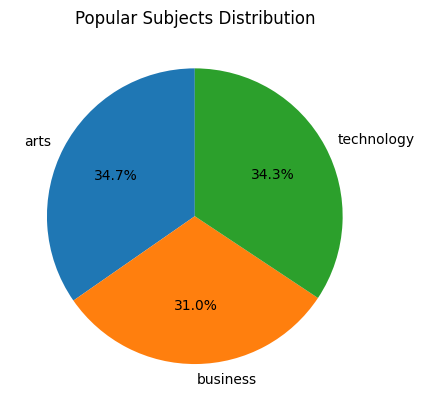

In [11]:
import matplotlib.pyplot as plt

subject_enrollments.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Popular Subjects Distribution")
plt.ylabel("")  # Hide ylabel for clarity
plt.show()


Yearly Growth (Line Chart):

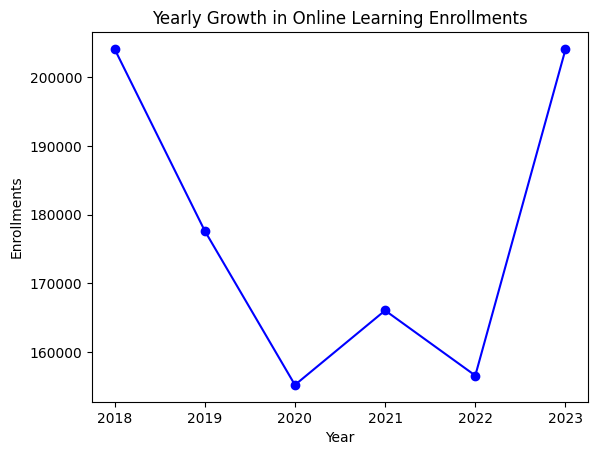

In [12]:
yearly_trends.plot(kind='line', marker='o', color='blue')
plt.title("Yearly Growth in Online Learning Enrollments")
plt.xlabel("Year")
plt.ylabel("Enrollments")
plt.show()


Regional Trends (Bar Chart):

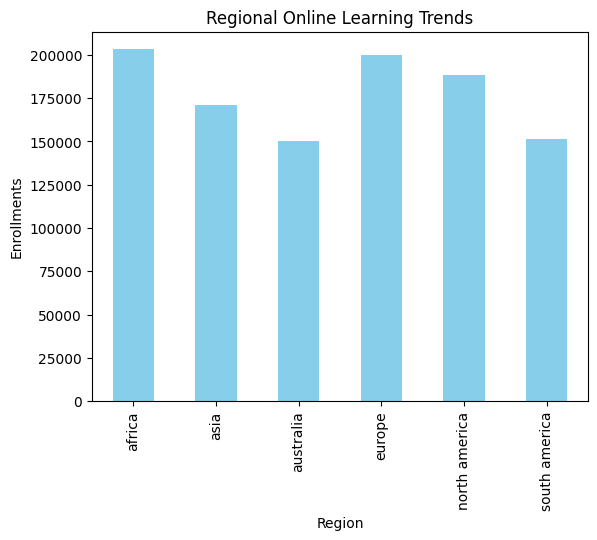

In [13]:
region_enrollments.plot(kind='bar', color='skyblue')
plt.title("Regional Online Learning Trends")
plt.xlabel("Region")
plt.ylabel("Enrollments")
plt.show()


# Summarize Findings

Combine key insights into a summary report:

In [14]:
summary = {
    "Popular Subjects": subject_enrollments.to_dict(),
    "Average Completion Rates": completion_rates.to_dict(),
    "Regional Trends": region_enrollments.to_dict()
}

# Save summary as CSV
summary_df = pd.DataFrame(summary)
summary_df.to_csv("summary_report.csv")
print("Summary report saved as summary_report.csv")


Summary report saved as summary_report.csv


Highlight insights:

Popular Subjects: Most enrollments occur in [top subject].

Completion Rates: Courses in [top completion rate subject] have the highest engagement.

Regional Trends: [Region] leads in online learning adoption.

# Optional Extensions

* Interactive Dashboard:
* Use Plotly for interactive visuals

In [ ]:
import plotly.express as px

fig = px.pie(df, values='Enrollments', names='Subject', title='Popular Subjects')
fig.show()

fig = px.line(df, x='Year', y='Enrollments', title='Yearly Enrollment Growth')
fig.show()

fig = px.bar(df, x='Region', y='Enrollments', title='Regional Trends')
fig.show()


# Conclusion for the Analysis of Online Learning Trends Project
The analysis of online learning trends provides valuable insights into the evolving landscape of education. Based on the dataset and analysis conducted, here are the key conclusions:

1.  Popular Subjects:

* Subjects like Technology, Business, and Arts dominate online learning enrollments.

* Technology courses attract the highest number of enrollments, reflecting the demand for skills in programming, data science, and other technical areas.

2. Completion Rates:

* Courses in Arts have the highest average completion rates, suggesting greater learner engagement and interest in creative subjects.

* Technology courses, while popular, show slightly lower completion rates, indicating the need for better course design to sustain learner engagement.

3. Regional Trends:

* North America and Asia lead in online learning adoption, with significant enrollments across multiple subjects.

* Emerging regions like Africa and South America are showing growth, highlighting the global expansion of e-learning.

4. Growth Trends:

* Online learning enrollments have steadily increased over the years, with significant growth observed during the pandemic era (2020–2022).

* This trend underscores the growing reliance on digital platforms for education, driven by accessibility and convenience.

5. Actionable Insights:

* Course creators should focus on subjects with high demand and optimize course structure to improve completion rates.

* Platforms should consider tailoring offerings to regional preferences and promoting courses in regions with untapped potential.

* Insights into yearly trends suggest that platforms should capitalize on peak growth periods by offering targeted campaigns.